In [1]:
import pickle
import pandas as pd 
import numpy as np 

In [2]:
# Shared folder to read data
SHARED_FOLDER = './yelp'

# Your folder to write new data and create notebooks.
MY_FOLDER = './output'

In [3]:
business_df=pd.read_csv('{}/more_business.csv'.format(SHARED_FOLDER))
business_df

,Unnamed: 0,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,...,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,avg_review_stars,reviews_count,tip_count,checkin_count
0,0,"{'Ambience': {'classy': False, 'trendy': False...",4gRF6fR91xqaur88C3_DWw,"['Pizza', 'Restaurants', 1]",Tempe,{},33.422218,-111.925847,False,23,...,25,25,25,25,25,25,2.391304,23,3,10
1,1,"{'Parking': {'garage': False, 'valet': False, ...",QQ0VZ1ggQO1aVf_GK6kn5g,"['Vegetarian', 'Diners', 'Vegan', 'Restaurants...",Phoenix,"{'Friday': {'close': '16:00', 'open': '07:00'}...",33.457226,-112.089834,False,216,...,16,7,16,7,16,7,4.216080,199,45,620
2,2,"{'Price Range': 2, 'Delivery': False, 'Wheelch...",iung9K8cFAPLdA9k2DUoxA,"['Barbeque', 'Restaurants', 1]",Phoenix,{},33.678615,-111.974607,False,31,...,25,25,25,25,25,25,2.300000,30,7,22
3,3,"{'Parking': {'garage': False, 'valet': False, ...",QBoynogVWpl44LglOEIYhw,"['Tex-Mex', 'Restaurants', 1]",Tempe,{},33.414355,-111.926294,True,46,...,25,25,25,25,25,25,3.500000,46,9,150
4,4,"{'Caters': False, 'Delivery': False, 'Price Ra...",36iFlBCnKNOyWFFXDjF0Hg,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Mesa,"{'Friday': {'close': '23:00', 'open': '10:30'}...",33.379200,-111.785500,True,5,...,22,10,22,10,22,10,2.600000,5,7,55
5,5,"{'Accepts Credit Cards': True, 'Parking': {'ga...",LTk9XA-htXS-ngVfnnQPUA,"['Food', 'Automotive', 'Convenience Stores', '...",Phoenix,"{'Friday': {'close': '00:00', 'open': '00:00'}...",33.479867,-112.117920,True,6,...,0,0,0,0,0,0,4.200000,5,2,124
6,6,"{'Parking': {'garage': False, 'valet': False, ...",D0tHnskAgaRjCBdoXVev_g,"['Fast Food', 'Restaurants', 1]",Tempe,{},33.407353,-111.945569,True,29,...,25,25,25,25,25,25,3.666667,27,15,178
7,7,"{'Price Range': 1, 'Delivery': False, 'Wheelch...",Kqn4J9NTgZdMAnV4HuYh5A,"['Food', 'Coffee & Tea', 1]",Phoenix,{},33.675854,-111.966734,False,62,...,25,25,25,25,25,25,4.338710,62,15,171
8,8,"{'By Appointment Only': False, 'Parking': {'ga...",omHC9VhPZIQiAXWnZEe8eA,"['Shopping', 'Drugstores', 'Beauty & Spas', 'F...",Gilbert,"{'Friday': {'close': '00:00', 'open': '00:00'}...",33.267073,-111.686889,True,10,...,0,0,0,0,0,0,2.875000,8,3,35
9,9,"{'Caters': False, 'Good For Dancing': False, '...",cjUmPLRT43wN9Z87A9BOpg,"['Bars', 'American (Traditional)', 'Nightlife'...",Phoenix,"{'Friday': {'close': '02:00', 'open': '11:00'}...",33.509568,-112.073327,True,85,...,2,11,1,11,1,11,2.756410,78,30,357


In [4]:
del business_df['Unnamed: 0']

In [5]:
#del business_df['attributes.AgesAllowed']

In [6]:
del business_df['avg_review_stars']

In [7]:
value=list(business_df['hours.Tuesday.open'].value_counts().index)
value

[25, 11, 10, 7, 6, 9, 8, 17, 0, 5, 16, 4, 12, 15, 18, 14, 13, 23, 3, 21, 19]

In [8]:
import xgboost as xgb
import operator

In [9]:
X_test=business_df[200:201]
features = list(X_test.columns[5:116])
X_test = X_test[features]
X_test

,latitude,longitude,open,review_count,stars,attributes.AcceptsCreditCards,attributes.AcceptsInsurance,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,...,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count
200,33.508865,-111.925004,True,115,4.0,1,2,2,1,0,...,7,22,7,22,7,22,7,96,12,216


In [10]:
y_test=X_test['stars']
y_test

200    4.0
Name: stars, dtype: float64

In [11]:
del X_test['stars']

In [12]:
business_df.drop(business_df.index[[200]],inplace=True)
business_df

,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,stars,...,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count
0,"{'Ambience': {'classy': False, 'trendy': False...",4gRF6fR91xqaur88C3_DWw,"['Pizza', 'Restaurants', 1]",Tempe,{},33.422218,-111.925847,False,23,2.5,...,25,25,25,25,25,25,25,23,3,10
1,"{'Parking': {'garage': False, 'valet': False, ...",QQ0VZ1ggQO1aVf_GK6kn5g,"['Vegetarian', 'Diners', 'Vegan', 'Restaurants...",Phoenix,"{'Friday': {'close': '16:00', 'open': '07:00'}...",33.457226,-112.089834,False,216,4.5,...,7,16,7,16,7,16,7,199,45,620
2,"{'Price Range': 2, 'Delivery': False, 'Wheelch...",iung9K8cFAPLdA9k2DUoxA,"['Barbeque', 'Restaurants', 1]",Phoenix,{},33.678615,-111.974607,False,31,2.5,...,25,25,25,25,25,25,25,30,7,22
3,"{'Parking': {'garage': False, 'valet': False, ...",QBoynogVWpl44LglOEIYhw,"['Tex-Mex', 'Restaurants', 1]",Tempe,{},33.414355,-111.926294,True,46,3.5,...,25,25,25,25,25,25,25,46,9,150
4,"{'Caters': False, 'Delivery': False, 'Price Ra...",36iFlBCnKNOyWFFXDjF0Hg,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Mesa,"{'Friday': {'close': '23:00', 'open': '10:30'}...",33.379200,-111.785500,True,5,2.5,...,10,22,10,22,10,22,10,5,7,55
5,"{'Accepts Credit Cards': True, 'Parking': {'ga...",LTk9XA-htXS-ngVfnnQPUA,"['Food', 'Automotive', 'Convenience Stores', '...",Phoenix,"{'Friday': {'close': '00:00', 'open': '00:00'}...",33.479867,-112.117920,True,6,4.5,...,0,0,0,0,0,0,0,5,2,124
6,"{'Parking': {'garage': False, 'valet': False, ...",D0tHnskAgaRjCBdoXVev_g,"['Fast Food', 'Restaurants', 1]",Tempe,{},33.407353,-111.945569,True,29,3.5,...,25,25,25,25,25,25,25,27,15,178
7,"{'Price Range': 1, 'Delivery': False, 'Wheelch...",Kqn4J9NTgZdMAnV4HuYh5A,"['Food', 'Coffee & Tea', 1]",Phoenix,{},33.675854,-111.966734,False,62,4.5,...,25,25,25,25,25,25,25,62,15,171
8,"{'By Appointment Only': False, 'Parking': {'ga...",omHC9VhPZIQiAXWnZEe8eA,"['Shopping', 'Drugstores', 'Beauty & Spas', 'F...",Gilbert,"{'Friday': {'close': '00:00', 'open': '00:00'}...",33.267073,-111.686889,True,10,3.0,...,0,0,0,0,0,0,0,8,3,35
9,"{'Caters': False, 'Good For Dancing': False, '...",cjUmPLRT43wN9Z87A9BOpg,"['Bars', 'American (Traditional)', 'Nightlife'...",Phoenix,"{'Friday': {'close': '02:00', 'open': '11:00'}...",33.509568,-112.073327,True,85,2.5,...,11,2,11,1,11,1,11,78,30,357


In [13]:
#train=business_review_tip_checkin_df.columns[5]
features = list(business_df.columns[5:116])
X_train = business_df[features]
del X_train['stars']
#del X['reviews_count']
#del X['avg_review_stars']
X_train

,latitude,longitude,open,review_count,attributes.AcceptsCreditCards,attributes.AcceptsInsurance,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,...,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count
0,33.422218,-111.925847,False,23,1,2,0,0,0,0,...,25,25,25,25,25,25,25,23,3,10
1,33.457226,-112.089834,False,216,1,2,1,1,0,0,...,7,16,7,16,7,16,7,199,45,620
2,33.678615,-111.974607,False,31,1,2,2,2,2,2,...,25,25,25,25,25,25,25,30,7,22
3,33.414355,-111.926294,True,46,1,2,1,1,0,0,...,25,25,25,25,25,25,25,46,9,150
4,33.379200,-111.785500,True,5,1,2,1,2,2,2,...,10,22,10,22,10,22,10,5,7,55
5,33.479867,-112.117920,True,6,1,2,0,2,2,2,...,0,0,0,0,0,0,0,5,2,124
6,33.407353,-111.945569,True,29,1,2,1,0,0,0,...,25,25,25,25,25,25,25,27,15,178
7,33.675854,-111.966734,False,62,1,2,3,2,2,2,...,25,25,25,25,25,25,25,62,15,171
8,33.267073,-111.686889,True,10,1,2,0,2,2,2,...,0,0,0,0,0,0,0,8,3,35
9,33.509568,-112.073327,True,85,1,2,2,1,0,0,...,11,2,11,1,11,1,11,78,30,357


In [14]:
y_train =business_df['stars']
y_train

0       2.5
1       4.5
2       2.5
3       3.5
4       2.5
5       4.5
6       3.5
7       4.5
8       3.0
9       2.5
10      2.5
11      3.5
12      4.0
13      3.0
14      3.0
15      4.0
16      3.5
17      4.0
18      2.5
19      4.0
20      2.5
21      3.0
22      4.5
23      4.0
24      4.5
25      3.5
26      1.5
27      4.0
28      4.5
29      4.0
       ... 
9654    4.0
9655    3.0
9656    2.0
9657    2.5
9658    3.0
9659    3.5
9660    4.0
9661    4.0
9662    1.5
9663    2.5
9664    2.5
9665    2.5
9666    3.0
9667    2.5
9668    4.0
9669    2.0
9670    4.0
9671    2.0
9672    5.0
9673    2.5
9674    4.0
9675    4.0
9676    3.0
9677    2.5
9678    3.5
9679    4.0
9680    4.0
9681    2.0
9682    4.0
9683    3.5
Name: stars, dtype: float64

In [15]:
from sklearn import cross_validation, metrics
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)

In [16]:
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).head(50)
feature=df['feature']
feature

0                            latitude
1                           longitude
2                       checkin_count
3                        review_count
4                       reviews_count
5                           tip_count
6               attributes.NoiseLevel
7               attributes.PriceRange
8                   hours.Sunday.open
9                  attributes.Alcohol
10          attributes.OutdoorSeating
11               attributes.DriveThru
12               hours.Saturday.close
13    attributes.WheelchairAccessible
14                  attributes.Caters
15                 hours.Friday.close
16                               open
17                    attributes.WiFi
18                hours.Saturday.open
19      attributes.AcceptsCreditCards
20                  hours.Friday.open
21                 hours.Sunday.close
22                  hours.Monday.open
23           attributes.GoodForGroups
24             attributes.Parking.lot
25                attributes.Delivery
26          

In [17]:
attribut_delta=[]
for i in feature[6:]:
    value=sorted(list(business_df[i].value_counts().index))
    value_init=X_test[i]
    dtest = xgb.DMatrix(X_test)
    ans = gbdt.predict(dtest)
    star_init=ans
    print('atrribut is %s \n'%i)
    print('stars initial is %s \n'%star_init)
    maxi=0
    for j in value:
        X_test[i]=j
        dtest = xgb.DMatrix(X_test)
        ans = gbdt.predict(dtest)
        if ans>maxi:
            maxi=ans
        print('value is %d'%j,',','result is %f'%ans)
    delta=maxi-star_init
    X_test[i]=value_init
    attribut_delta.append((i,delta[0]))
    print('delta max is %s \n'%delta)
    print('-------------------------------------------')

atrribut is attributes.NoiseLevel 

stars initial is [ 3.57533503] 

value is 0 , result is 3.615846
value is 1 , result is 3.643816
value is 2 , result is 3.575335
value is 3 , result is 3.493630
value is 4 , result is 3.443775
delta max is [ 0.06848097] 

-------------------------------------------
atrribut is attributes.PriceRange 

stars initial is [ 3.44377542] 

value is 0 , result is 3.438450
value is 1 , result is 3.499476
value is 2 , result is 3.443775
value is 3 , result is 3.443775
value is 4 , result is 3.443775
delta max is [ 0.05570054] 

-------------------------------------------
atrribut is hours.Sunday.open 

stars initial is [ 3.44377542] 

value is 0 , result is 3.420727
value is 3 , result is 3.420727
value is 4 , result is 3.420727
value is 5 , result is 3.459177
value is 6 , result is 3.435535
value is 7 , result is 3.443775
value is 8 , result is 3.468700
value is 9 , result is 3.468700
value is 10 , result is 3.468700
value is 11 , result is 3.468700
value is 

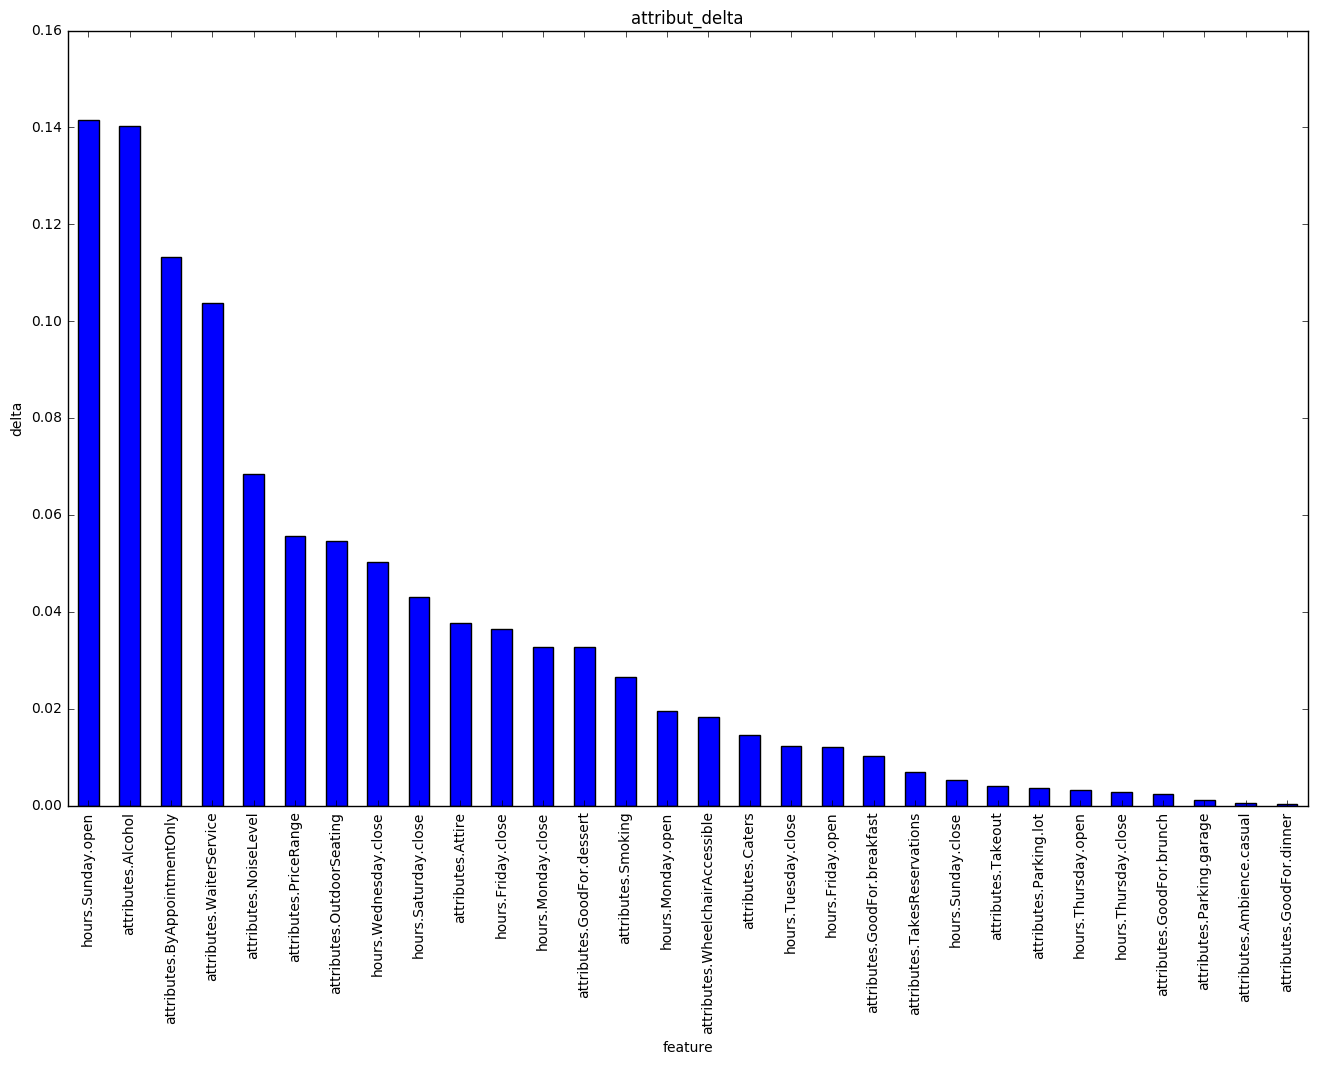

In [18]:
from matplotlib import pylab as plt
df = pd.DataFrame(attribut_delta, columns=['feature', 'delta'])
df=df.sort_values(by='delta',ascending=False).head(30)

plt.figure()
df.plot(kind='bar', x='feature', y='delta', legend=False, figsize=(16, 10))
plt.title('attribut_delta')
plt.ylabel('delta')
plt.gcf().savefig('attribut_delta.png')
plt.show()